# **Project Title: Machine Learning for Email Spam Classification: A Comparative Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **1. Dataset Description**

`Dataset Description`

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2. Fall 2023/CSE 422/combined_data.csv")
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
df.columns

Index(['label', 'text'], dtype='object')

* **The dataset has One feature ("text") and One output Target Variable ("label").**

In [ ]:
df['label'].unique()

array([1, 0])

* **As we can see there are only 2 classes. So, this is classification problem. More specifically binary classification problem.**

In [ ]:
df.shape

(83448, 2)

In [ ]:
df.shape[0] # number of row

83448

* **The dataset has 83,448 datapoints. As the dataset has 83,448 rows.**

* **We have categorical feature ("text") in our dataset.**

`Imbalanced Dataset`

In [ ]:
df["label"].value_counts()

1    43910
0    39538
Name: label, dtype: int64

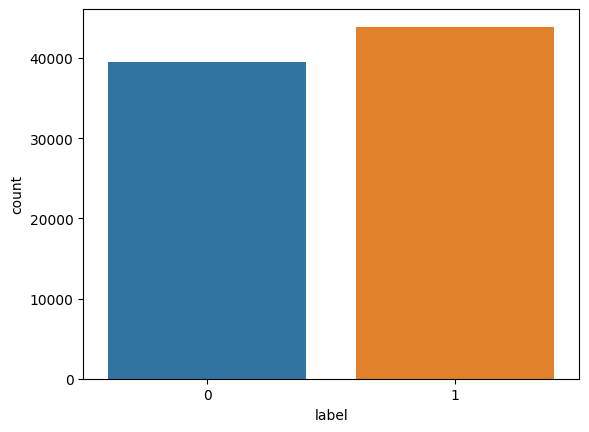

In [ ]:
sns.countplot(x=df['label'])
plt.show();

* **We can see that this is an imbalanced dataset. All unique classes do not have equal number of instances.**

# **2. Exploring Data Set**


In [ ]:
df_exp = df.copy()

In [ ]:
df_exp.shape

(83448, 2)

In [ ]:
df_exp.groupby("label").describe().T

label                                                        0  \
text count                                               39538   
     unique                                              39538   
     top      computer connection from cnn com wednesday es...   
     freq                                                    1   

label                                                        1  
text count                                               43910  
     unique                                              43910  
     top     ounce feather bowl hummingbird opec moment ala...  
     freq                                                    1

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Counting number of character in each text

df_exp["num_characters"] = df_exp["text"].apply(len)
df_exp.head()

,label,text,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [ ]:
# Counting number of words in each text

df_exp["num_words"] = df_exp["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df_exp.head()

,label,text,num_characters,num_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223


In [ ]:
# Counting no of sentence in each text

df_exp["num_sentences"] = df_exp["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df_exp.head()

,label,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [ ]:
# Statistical info of "num_characters","num_words","num_sentences" columns

df_exp[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,83448.000000,83448.000000,83448.000000
mean,1662.952725,285.022733,7.250060
std,4178.578068,727.032941,34.832317
min,1.000000,1.000000,1.000000
25%,449.000000,80.000000,1.000000
50%,879.000000,154.000000,1.000000
75%,1861.000000,314.000000,5.000000
max,598705.000000,101984.000000,3093.000000


In [ ]:
# Statistical info of "ham text"

df_exp[df_exp["label"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,39538.000000,39538.000000,39538.000000
mean,2121.693814,367.659467,8.137362
std,5666.075286,986.766959,42.112956
min,1.000000,1.000000,1.000000
25%,579.000000,107.000000,1.000000
50%,1139.000000,202.000000,1.000000
75%,2174.000000,381.000000,6.000000
max,598705.000000,101984.000000,2827.000000


In [ ]:
# Statistical info of "spam text"

df_exp[df_exp["label"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,43910.000000,43910.000000,43910.000000
mean,1249.887247,210.613915,6.451105
std,1978.631507,340.723605,26.599623
min,1.000000,1.000000,1.000000
25%,360.000000,62.000000,1.000000
50%,704.000000,122.000000,1.000000
75%,1510.000000,250.000000,5.000000
max,144087.000000,25444.000000,3093.000000


* **We can see that ham text contains much more character, words and sentences than spam text**

<Axes: >

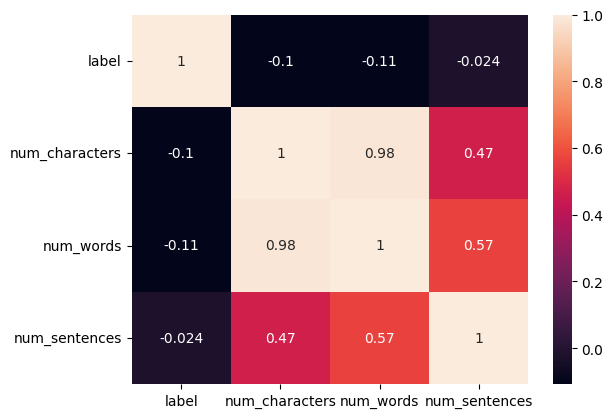

In [ ]:
sns.heatmap(df_exp[["label","num_characters","num_words","num_sentences"]].corr(), annot=True)

# **3. Dataset Pre-processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
# Checking for missing values

df.isnull().sum()

label    0
text     0
dtype: int64

* **The data frame does not contain any null value**

In [ ]:
# Checking for duplicate values

df.duplicated().sum()

0

* **The data frame does not contain any duplicate value**

In [ ]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


* **As we can see the "text" column contains Categorical values, we need to encode it. Because Text data needs to be converted to numbers. Most machine learning algorithms work with numerical data and cannot process raw text directly. Encoding converts text into numbers that can be fed into the algorithms.**  

In [ ]:
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process_text(text):
    stop = set(stopwords.words('english'))
    lemma = WordNetLemmatizer()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # Tokenize
    tokens = [t for t in text.split() if t.isalpha()]

    # Remove stopwords and lemmatize
    clean_tokens = [lemma.lemmatize(t.lower()) for t in tokens if t not in stop]

    return ' '.join(clean_tokens)

In [ ]:
df["Processed_text"] = df["text"].apply(process_text)
df.head()

,label,text,Processed_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...


In [ ]:
#Taking less examples as we will be out of memory if we use all 83k examples of tha dataset

spam_data = df[df['label'] == 1].sample(4000)
ham_data = df[df['label'] == 0].sample(4000)

# Concat spam_data and ham_data
df_balanced = pd.concat([spam_data,ham_data],axis=0)
df_balanced.shape

(8000, 3)

In [ ]:
df_balanced.head()

,label,text,Processed_text
21402,1,symbol alert http imagecloset com uimages bfie...,symbol alert http imagecloset com uimages bfie...
77477,1,quality replica watches escapenumber exact all...,quality replica watch escapenumber exact brand...
29663,1,"good morning ,\nwe we offer latest oem package...",good morning offer latest oem package graphic ...
25691,1,each file system in a storage pool has access ...,file system storage pool access unused space s...
60849,1,and ballet for each obesity it may evenunstruc...,ballet obesity may evenunstructured play passi...


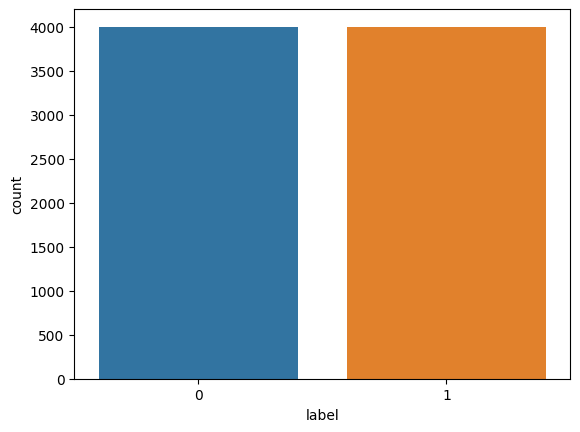

In [ ]:
sns.countplot(x=df_balanced['label'])
plt.show();

* **Dataset is balanced now.**

In [ ]:
X = df_balanced["Processed_text"]
Y = df_balanced["label"]

In [ ]:
X

21402    symbol alert http imagecloset com uimages bfie...
77477    quality replica watch escapenumber exact brand...
29663    good morning offer latest oem package graphic ...
25691    file system storage pool access unused space s...
60849    ballet obesity may evenunstructured play passi...
                               ...                        
75611    june escapenumber escapenumber home u world po...
53275    thursday escapenumber escapenumber escapenumbe...
77679    h hermann writes h hi want test latest sd obse...
58298    google news alert bush bush popularity time lo...
30956    thanks worked trial error installed pmg packag...
Name: Processed_text, Length: 8000, dtype: object

In [ ]:
# Here we are vectorising the Text data (encoding)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Encoading
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()

In [ ]:
X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **4. Dataset splitting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, ConfusionMatrixDisplay, classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=422) # Train set (70%), Test set (30%)

In [ ]:
X.shape

(8000, 74935)

In [ ]:
x_train.shape, y_train.shape # dimention matched

((5600, 74935), (5600,))

In [ ]:
x_test.shape, y_test.shape # dimention matched

((2400, 74935), (2400,))

# **5. Model Training and Testing**

In [ ]:
# Creating a function to plot the confusion matrix and to report precision and recall for each model

def report(conf_matrix, model_name):
    # Defining labels for the matrix
    labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

    # Reshaping the confusion matrix into a flat array
    conf_matrix_flat = [item for sublist in conf_matrix for item in sublist]

    # Calculating precision and recall
    true_negative, false_positive, false_negative, true_positive = conf_matrix_flat
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

    # Ploting the heatmap using seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted ham', 'Predicted spam'], yticklabels=['Actual ham', 'Actual spam'])
    plt.title(f'Confusion Matrix for "{model_name}" model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Displaying precision and recall in the plot

    plt.text(0.5, -0.2,f'Precision: {precision:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, -0.3, f'Recall: {recall:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()

    # Returning precision and recall as a list
    return [precision, recall]


## Naive Bayes

In [ ]:
# Training and Fitting Model
from sklearn.naive_bayes import GaussianNB

GaussianNB = GaussianNB()
GaussianNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
# predicting

y_pred_NB = GaussianNB.predict(x_test)

In [ ]:
# accuracy

NB_acc = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy of Naive Bayes: {NB_acc*100:.2f}%")

Accuracy of Naive Bayes: 92.38%


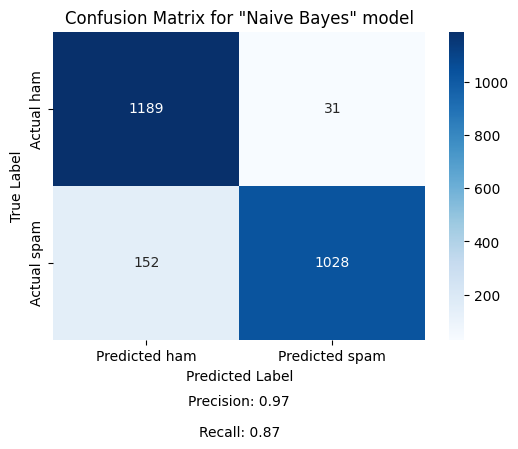

In [ ]:
report_NB = report(confusion_matrix(y_test, y_pred_NB), "Naive Bayes")
precision_NB = round(report_NB[0], 2)
recall_NB = round(report_NB[1], 2)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Training and Fitting model

LR = LogisticRegression(C=1, fit_intercept=True, solver='lbfgs', max_iter=300)
LR.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=300)

In [ ]:
# predicting

y_pred_LR = LR.predict(x_test)

In [ ]:
# accuracy

LR_acc = accuracy_score(y_test, y_pred_LR)
print(f"Accuracy of Logistic Regression: {LR_acc*100:.2f}%")

Accuracy of Logistic Regression: 96.83%


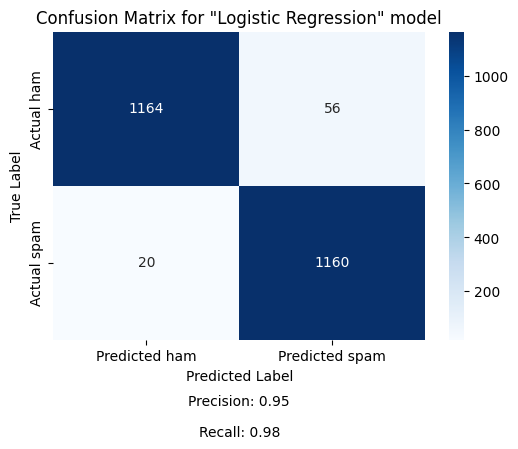

In [ ]:
# Report

report_LR = report(confusion_matrix(y_test, y_pred_LR), "Logistic Regression")
precision_LR = round(report_LR[0], 2)
recall_LR = round(report_LR[1], 2)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Traing and Fitting Model

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predicting

y_pred_DT = DT.predict(x_test)

In [ ]:
# accuracy

DT_acc = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy of Decision Tree: {DT_acc*100:.2f}%")

Accuracy of Decision Tree: 92.17%


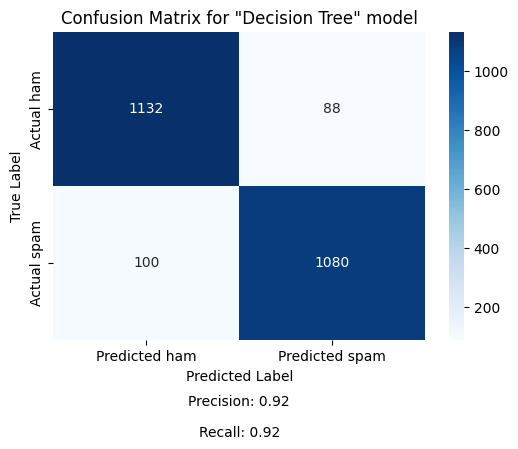

In [ ]:
# Report

report_DT = report(confusion_matrix(y_test, y_pred_DT), "Decision Tree")
precision_DT = round(report_DT[0], 2)
recall_DT = round(report_DT[1], 2)

## K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Training and Fitting the model

KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
# predicting

y_pred_KNN = KNN.predict(x_test)

In [ ]:
# accuracy

KNN_acc = accuracy_score(y_test, y_pred_KNN)
print(f"Accuracy of KNN: {KNN_acc*100:.2f}%")

Accuracy of KNN: 86.58%


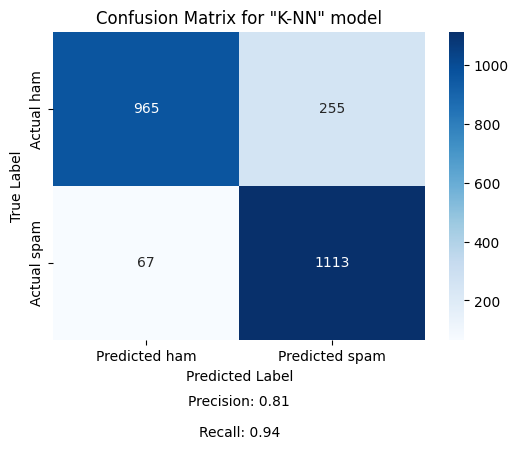

In [ ]:
# Report

report_KNN = report(confusion_matrix(y_test, y_pred_KNN), "K-NN")
precision_KNN = round(report_KNN[0], 2)
recall_KNN = round(report_KNN[1], 2)

# **6. Comparison analysis**

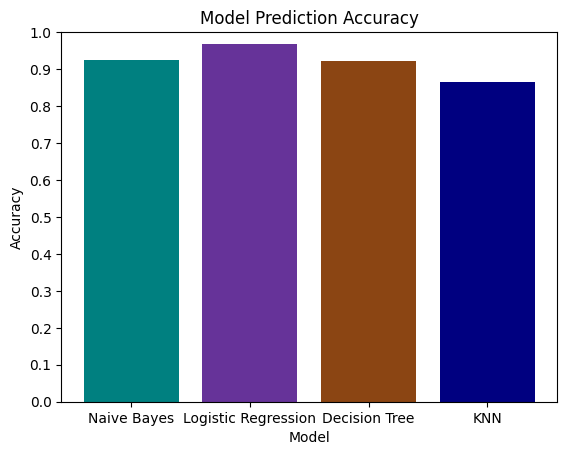

In [ ]:
# Model names for the x-axis
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', "KNN"]

# Accuracy values for the y-axis
accuracy_values = [NB_acc, LR_acc, DT_acc, KNN_acc]

# Creating a bar chart
plt.bar(models, accuracy_values, color=['teal', 'rebeccapurple', 'saddlebrown', 'navy'])
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(11)])
plt.title('Model Prediction Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

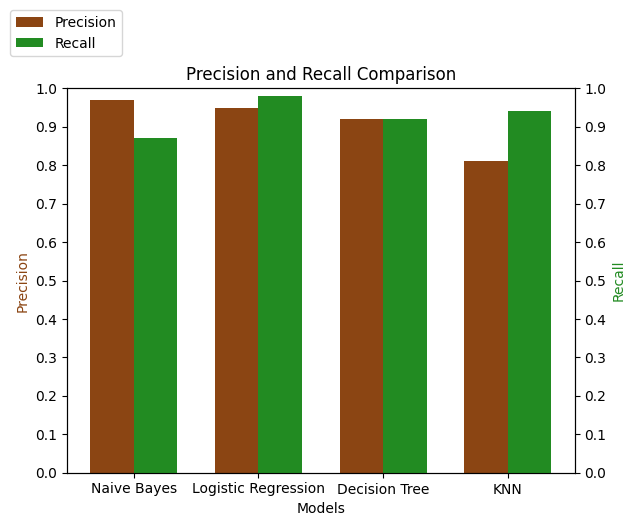

In [ ]:
# Precision and Recall values for the y-axis
precision_values = [precision_NB, precision_LR, precision_DT, precision_KNN]
recall_values = [recall_NB, recall_LR, recall_DT, recall_KNN]

bar_width = 0.35
index = np.arange(len(models))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

bar1 = ax1.bar(index, precision_values, bar_width, color='saddlebrown')
ax1.set_ylabel('Precision', color='saddlebrown')

bar2 = ax2.bar(index + bar_width, recall_values, bar_width, color='forestgreen')
ax2.set_ylabel('Recall', color='forestgreen')

ax1.set_title("Precision and Recall Comparison")
ax1.set_ylim(0, 1.0)
ax1.set_yticks(np.round(np.arange(0, 1.1, 0.1),1))

ax2.set_ylim(0, 1.0)
ax2.set_yticks(np.round(np.arange(0, 1.1, 0.1),1))

ax1.set_xlabel('Models')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models)


fig.tight_layout()

fig.legend((bar1, bar2),
           ('Precision', 'Recall'),
           bbox_to_anchor=(0.20, 1.10),
           fancybox=True)

plt.show()

In [ ]:
# Creating dictionaries
accuracy = {"Naive Bayes": NB_acc, "Logistic Regression": LR_acc, "Decision Tree": DT_acc, "KNN": KNN_acc}
precision = {"Naive Bayes": precision_NB, "Logistic Regression": precision_LR, "Decision Tree": precision_DT, "KNN": precision_KNN}
recall = {"Naive Bayes": recall_NB, "Logistic Regression": recall_LR, "Decision Tree": recall_DT, "KNN": recall_KNN}

# Creating dataframe
model_comparison_df = pd.DataFrame({"Accuracy": accuracy, "Precision": precision, "Recall": recall})

model_comparison_df

,Accuracy,Precision,Recall
Naive Bayes,0.923750,0.97,0.87
Logistic Regression,0.968333,0.95,0.98
Decision Tree,0.921667,0.92,0.92
KNN,0.865833,0.81,0.94


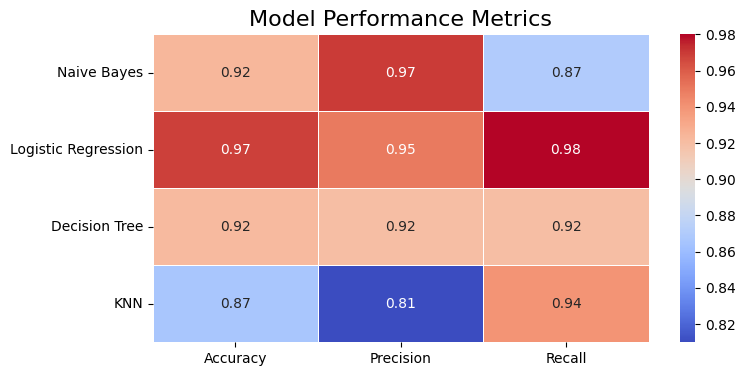

In [ ]:
# Creating a heatmap
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(model_comparison_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
heatmap.set_title('Model Performance Metrics', fontsize=16)

plt.show()